<font size=7> Creating Raw Datasets

We download sections of large raw datasets that braingeneers have saved on the NRP

<font color="orange">

**Note:** 
Some datasets have already been processed for you on Github. Unless your startng from scratch on a new dataset, you can skip this this tutorial and go straight into the next one, which covers analyzing data.

In [1]:
from human_hip.raw_data import data_create, data_get_experiments
from human_hip.spike_data import read_phy_files,  plot_raster

Find the portion of the recording you want. Pretend we want **120-130 seconds**

In [2]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

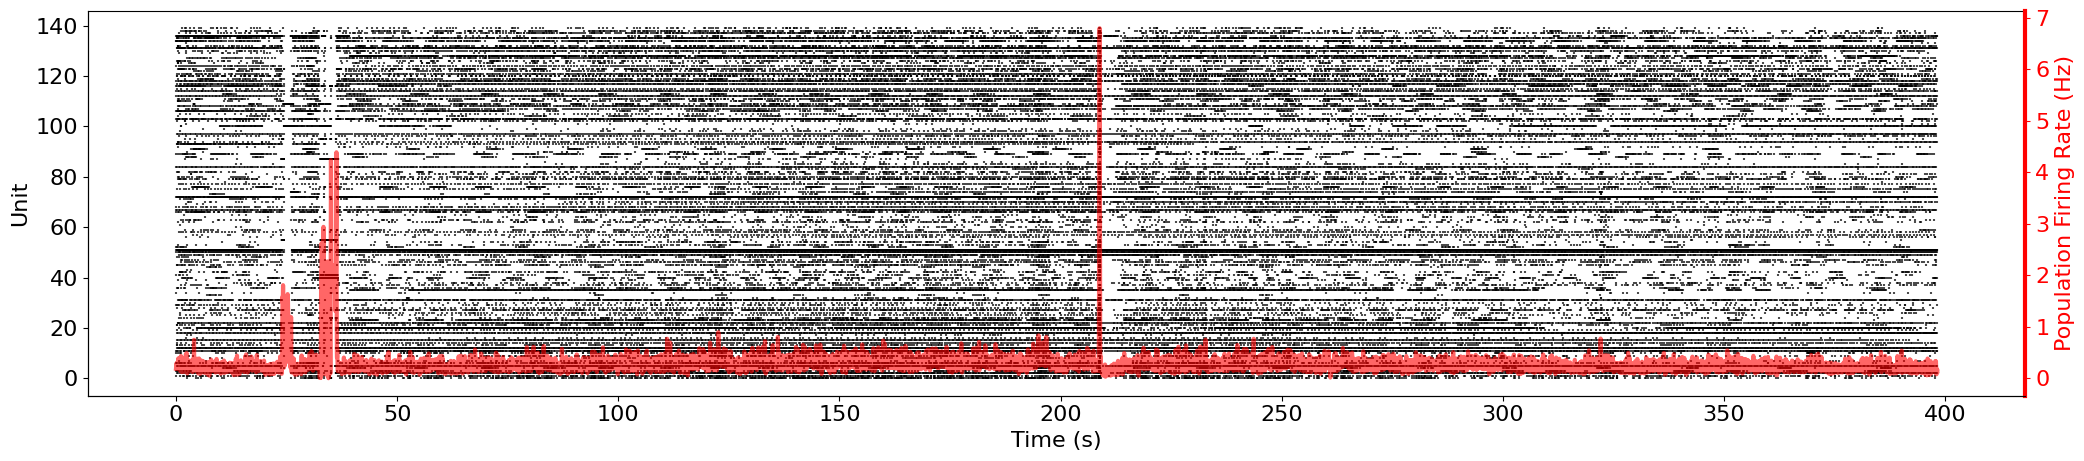

In [3]:
plot_raster(sd, size=(25,5) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

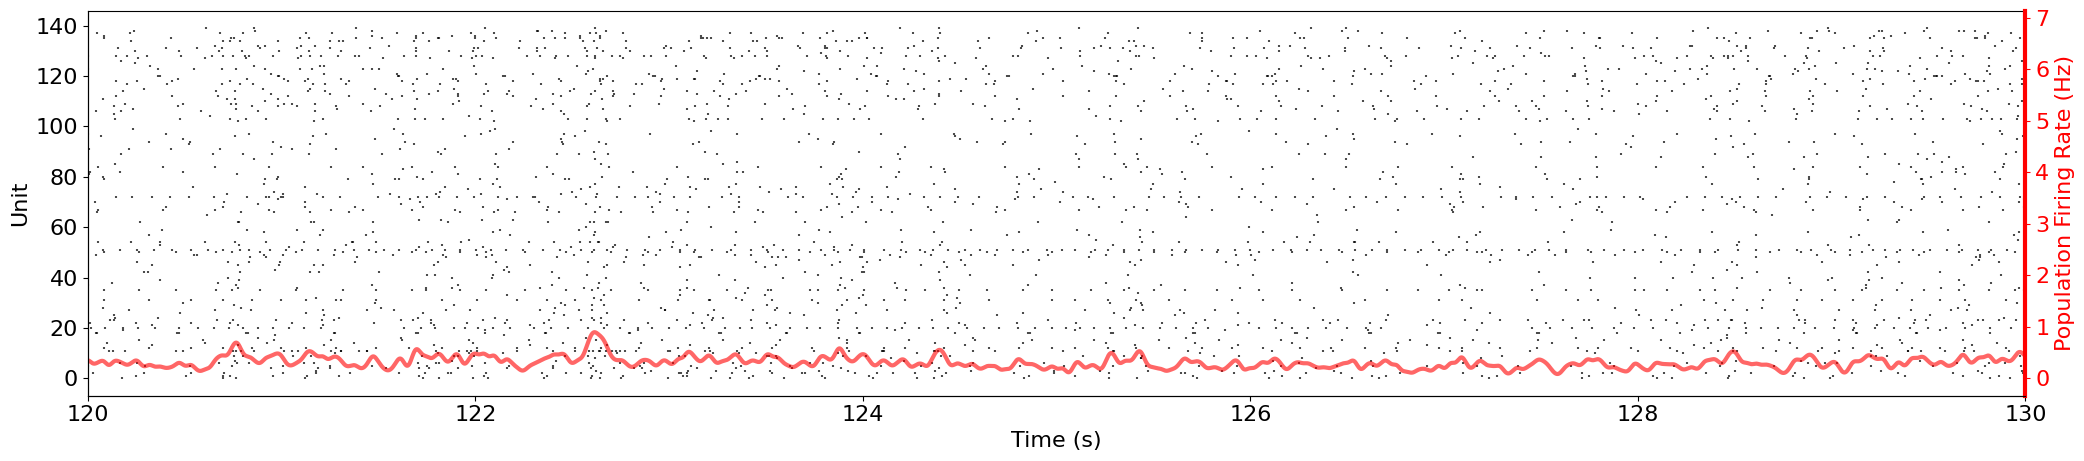

In [4]:
plot_raster(sd, size=(25,5), xlim=(120,130) )


We now need to download the raw data from the braingeneers cloud storage, the NRP. To do this you will need the braingeneers credentials file. If you don't have one, reach out to David Parks about this. Once you have a credentials file, upload it into this codespace. Whenever you create a new codespace, you will have to upload the credentials file. Put the credentials file in the following folder locaction in order to run the commands that follow.

`/home/jovyan/.aws/credentials`

Use the UUID of the data to find all the raw files

In [6]:
data_get_experiments("2023-04-02-e-hc328_unperturbed")

experiment1  -  original/data/hc3.28_hckcr1_chip16835_plated34.2_rec4.2.raw.h5


In [5]:
data_create("2023-04-02-e-hc328_unperturbed", "experiment1", start_s=120, length_s=10,
                      save_path="/fake/location/2023-04-02-e-hc328_unperturbed/base_start120s_stop120s_fs1ms.pkl" )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2023-04-02-e-hc328_unperturbed is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


# <font color="orange"> OLD

## <font color="orange">Old - Download Data Without function

## <font color="orange">old- Proccess Data

For all the channels,we get their x/y locations

shape: (972, 4)
channel_id ,  x ,  y ,  ?
[[0.0000e+00 1.8964e+04 7.7000e+02 1.5050e+03]
 [1.0000e+00 1.3714e+04 1.2950e+03 1.0850e+03]
 [2.0000e+00 1.2160e+04 1.0500e+03 9.6250e+02]
 [3.0000e+00 1.7446e+04 1.1550e+03 1.3825e+03]]


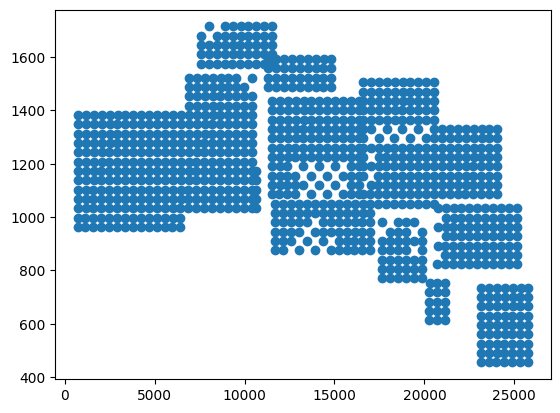

In [18]:
channel_map = np.array( metadata['ephys_experiments']['experiment1']["mapping"] )

print( "shape:", channel_map.shape )
print( "channel_id , ", "x , ", "y , ", "?")
print( channel_map[0:4,:] )
plt.scatter(channel_map[:,1], channel_map[:,2] ) # make a scatterplot of the first and seconds columns of channel_map

For our analysis we don't actually need to consider every 20000 datapoints per second. For this reason, we `downsample` this subset of the data, which means that we consider, say, every other datapoint. This cuts the size of the data in half. In actuallity we on take every 20th datapoint. This brings the frame rate down from 20000 frames per second to 1000 frames per second. We used the `decimate` function to do the downsampling.

In [24]:
data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

print( "data has ", 20000/20, " frames per second")

data has  1000.0  frames per second


##  <font color="orange"> old- Save Data

Save the dataset. We save the data in the folder `ephys_raw` instead of ephys so that the data is available on Github.

<font color="orange">This line is commented out to make sure we don't accidently overwrite the previous saved data

In [28]:
to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20}

# with open( '/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check that we can load the data correctly

In [41]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl', 'rb')
checkit = pickle.load(file)
file.close()
checkit

{'data': array([[392.7012 , 395.25186, 395.22208, ..., 397.01382, 400.0254 ,
         402.39658],
        [519.29395, 521.4816 , 521.74756, ..., 526.737  , 524.22644,
         522.1528 ],
        [181.98549, 185.0614 , 183.18318, ..., 186.21301, 182.86412,
         182.11726],
        ...,
        [523.55554, 527.2294 , 528.5211 , ..., 525.5148 , 525.2215 ,
         525.5384 ],
        [355.98215, 358.15442, 358.1233 , ..., 340.62662, 340.09097,
         340.0443 ],
        [471.07196, 474.3375 , 474.87775, ..., 468.7652 , 469.24545,
         469.9821 ]], dtype=float32),
 'xy': array([[18964.,   770.],
        [13714.,  1295.],
        [12160.,  1050.],
        ...,
        [ 8898.,  1715.],
        [23142.,   735.],
        [20540.,  1400.]]),
 'frame_rate': 1000.0}

## <font color="orange">Old - Download Data Locally

<font color="red">

**Important**

This tutorial will require downloading large datasets from S3, also, loading the datasets in python in order to process them requires lot of memory. You will need to select a codespace that has more RAM and storage in order to run the examples shown below. I used a codespace with 64gb of RAM.

### <font color="orange"> Download Data

<font color="orange">

**Note-** This section describes how to download all the raw data locally to then load it into python. I don't do this anymore. Instead I use David Park's latest functions to load only the portion of data I need into python. This still requires a `credentials` file, but the rest of the steps can be ignored. I leave the section here just in case it might be useful.

We now need to download the raw data from the braingeneers cloud storage, the NRP. To do this you will need the braingeneers credentials file. If you don't have one, reach out to David Parks about this. Once you have a credentials file, upload it into this codespace. Whenever you create a new codespace, you will have to upload the credentials file. Put the credentials file in the following folder locaction in order to run the commands that follow.

`/home/jovyan/.aws/credentials`

You will now need to locate the raw data you want to download on the NRP. Use `ls` command to sift through folder until you find the file/folder you want to download. Note, these commands shoudl be run inside the codespace's terminal, not a notebook.

```
aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 ls s3://braingeneers/ephys/2023-04-02-e-hc328_unperturbed/
```

You can download the data into the codesapce using the `cp` command below. Download the data into hte folder `/workspaces/human_hippocampus/data/ephys` . This ensures that whatever you download won't be saved to Github. The reason we don't save these to Github repository is because the files are massive.

 In order to properly access the files you will need to follow the same folder format as seen on the NRP. You will also need to make sure you download the `metadata.json` file for the turorial to work. Note, while this comands works in this example, in general there may be a LOT GB's of raw data, so insteado of download the entire folder from the NRP, you may have to download the specific files you need.

```
aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp s3://braingeneers/ephys/2023-04-02-e-hc328_unperturbed /workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/ --recursive
```

In [ ]:
### Example comands for downloading indiviual files
#mkdir -p "/workspaces/human_hippocampus/data/ephys/2022-10-20-e-/original/data/"
#aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp "s3://braingeneers/ephys/2022-10-20-e-/original/data/hc9.19_chp-16849_plated-10.19.22_rec10.19.22.raw.h5" "/workspaces/human_hippocampus/data/ephys/2022-10-20-e-/original/data/hc9.19_chp-16849_plated-10.19.22_rec10.19.22.raw.h5" 
#mkdir -p "/workspaces/human_hippocampus/data/ephys/2022-10-20-e-/derived"
#aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp "s3://braingeneers/ephys/2022-10-20-e-/derived" "/workspaces/human_hippocampus/data/ephys/2022-10-20-e-/derived" --recursive 
#aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp "s3://braingeneers/ephys/2022-10-20-e-/metadata.json" "/workspaces/human_hippocampus/data/ephys/2022-10-20-e-/" 

### <font color="orange">Load into Python

In [ ]:
# braingeneers.set_default_endpoint("/workspaces/human_hippocampus/data")
# metadata = ephys.load_metadata("2023-04-02-e-hc328_unperturbed")